# **Setup**

In [1]:
# download data
# !wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1nckRRVYRiWG8VWoUY4wwtuQm6DjIbpmo' -O w_review_train.csv

# # download font for matplot
# !wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1DsfYE5uI1ZA_IXDNkezQTv-NQehxgZQy' -O THSarabun.ttf

# install library
!pip install pythainlp
# get tensorflow
# !pip install --upgrade pip
!pip install tensorflow
!pip install scikit-learn

# Import Library
---

In [2]:
from tensorflow import keras

import pandas as pd
import numpy as np
from pythainlp import word_tokenize
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences

from sklearn.metrics import confusion_matrix, classification_report

---
### Prepare Data {Tokenize Word}
---

In [9]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']  # Change 'acc' to 'accuracy'
    val_acc = history.history['val_accuracy']  # Change 'val_acc' to 'val_accuracy'
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()


In [11]:
# check data
data = pd.read_csv("NLP_Elder_Companion.csv")
print(data.shape)
print(data.head())

# word tokenize
comment = data["Text"].apply(word_tokenize, engine="newmm", keep_whitespace=False)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(comment)
comment = tokenizer.texts_to_sequences(comment)

# adjust sequence to have same size
maxlen = max([len(s) for s in comment])
print("max len", maxlen)
x = pad_sequences(comment, maxlen=maxlen, padding="post")

y = np.array(data["Class"], dtype=np.int32).reshape(-1, 1)

# One-hot encode the target data
num_classes = 9
y = to_categorical(y, num_classes=num_classes)

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=7)

(453, 2)
   Class                        Text
0      0         คนแก่กินอะไรได้บ้าง
1      0                ควรกินอะไรดี
2      0               อาหารที่แนะนำ
3      0              ทานอะไรได้บ้าง
4      0  อาหารที่เหมาะกับผู้สูงอายุ
max len 21


In [14]:
from keras.layers import SimpleRNN, LSTM, Embedding, Flatten, Dense, Bidirectional, Conv1D, GlobalMaxPooling1D
from keras.models import Sequential, Model
from keras.losses import CategoricalCrossentropy
from keras.optimizers import Adam

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_21 (Embedding)    (None, 21, 2000)          1088000   
                                                                 
 bidirectional_17 (Bidirect  (None, 4000)              64016000  
 ional)                                                          
                                                                 
 dense_23 (Dense)            (None, 9)                 36009     
                                                                 
Total params: 65140009 (248.49 MB)
Trainable params: 65140009 (248.49 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/4
8/8 [==============================] - 57s 7s/step - loss: 2.2024 - accuracy: 0.1768 - val_loss: 1.9073 - val_accuracy: 0.3846
Epoch 2/4
8/8 [==============================] - 54s 7s/step - loss: 1

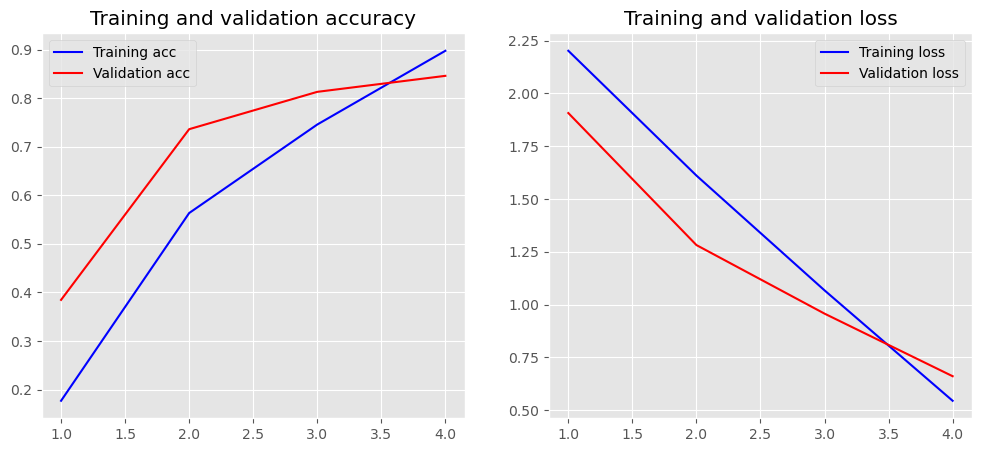

In [30]:
# Tokenizer().word_index = word index
# +1 is from function paramiter
vocabSize = len(tokenizer.word_index) + 1

model = Sequential()
model.add(Embedding(input_dim=vocabSize,
                   output_dim=2000,
                   input_length=maxlen))
model.add(Bidirectional(LSTM(2000)))
model.add(Dense(9, activation="softmax"))

model.summary()

lost_func = CategoricalCrossentropy()
otm = Adam(learning_rate=0.00089)
model.compile(optimizer=otm, loss=lost_func, metrics=["accuracy"])

history = model.fit(xTrain, yTrain, validation_data=(xTest, yTest), batch_size=46, epochs=4, verbose=1)

y_predict = model.predict(xTest)
print(model.evaluate(xTest, yTest, verbose=1))

y_predict = np.argmax(y_predict, axis=1)
cm = confusion_matrix(np.argmax(yTest, axis=1), y_predict)
report = classification_report(np.argmax(yTest, axis=1), y_predict)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(report)

plot_history(history)

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_23 (Embedding)    (None, 21, 2000)          1088000   
                                                                 
 conv1d_2 (Conv1D)           (None, 12, 2000)          40002000  
                                                                 
 global_max_pooling1d_2 (Gl  (None, 2000)              0         
 obalMaxPooling1D)                                               
                                                                 
 dense_26 (Dense)            (None, 2000)              4002000   
                                                                 
 dense_27 (Dense)            (None, 9)                 18009     
                                                                 
Total params: 45110009 (172.08 MB)
Trainable params: 45110009 (172.08 MB)
Non-trainable params: 0 (0.00 Byte)
_________

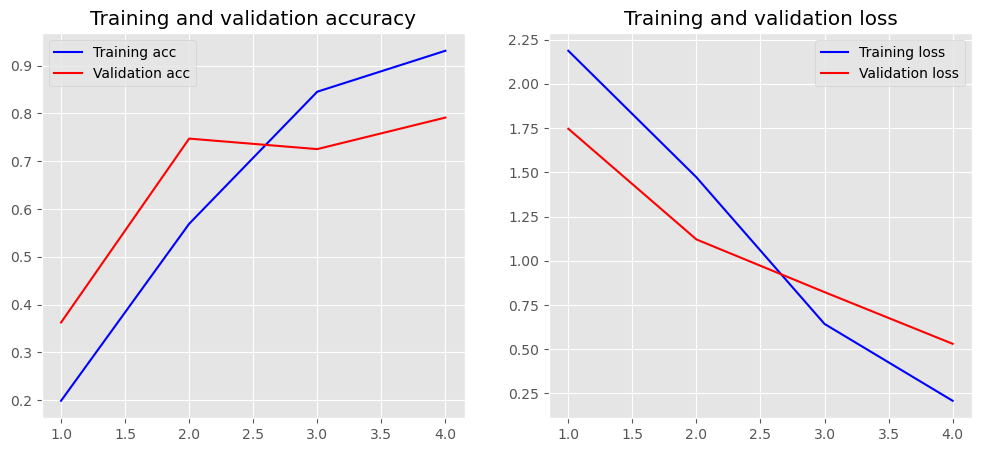

In [32]:
# Tokenizer().word_index = word index
# +1 is from function paramiter
vocabSize = len(tokenizer.word_index) + 1

model = Sequential()
model.add(Embedding(input_dim=vocabSize,
                   output_dim=2000,
                   input_length=maxlen))
model.add(Conv1D(2000, 10, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(2000, activation='relu'))
model.add(Dense(9, activation="softmax"))

model.summary()

lost_func = CategoricalCrossentropy()
otm = Adam(learning_rate=0.00089)
model.compile(optimizer=otm, loss=lost_func, metrics=["accuracy"])

history = model.fit(xTrain, yTrain, validation_data=(xTest, yTest), batch_size=46, epochs=4, verbose=1)

y_predict = model.predict(xTest)
print(model.evaluate(xTest, yTest, verbose=1))

y_predict = np.argmax(y_predict, axis=1)
cm = confusion_matrix(np.argmax(yTest, axis=1), y_predict)
report = classification_report(np.argmax(yTest, axis=1), y_predict)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(report)

plot_history(history)

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_28 (Embedding)    (None, 21, 2000)          1088000   
                                                                 
 lstm_22 (LSTM)              (None, 2000)              32008000  
                                                                 
 dense_34 (Dense)            (None, 9)                 18009     
                                                                 
Total params: 33114009 (126.32 MB)
Trainable params: 33114009 (126.32 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
x (362, 21) : y (362, 9)
Epoch 1/4
8/8 [==============================] - 29s 4s/step - loss: 2.3091 - accuracy: 0.1160 - val_loss: 2.2274 - val_accuracy: 0.1868
Epoch 2/4
8/8 [==============================] - 27s 3s/step - loss: 2.2157 - accuracy: 0.1188 - val_loss: 1.93

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


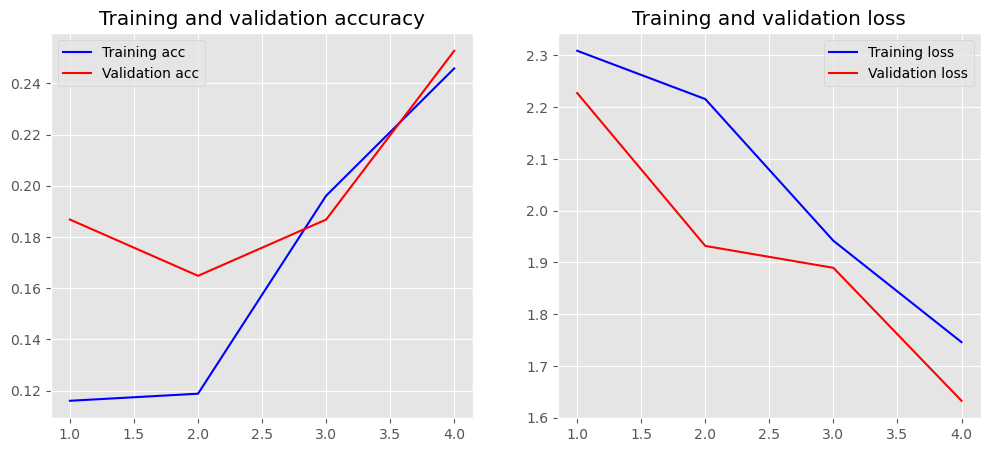

In [37]:
# Tokenizer().word_index = word index
# +1 is from function paramiter
vocabSize = len(tokenizer.word_index) + 1

model = Sequential()
model.add(Embedding(input_dim=vocabSize,
                   output_dim=2000,
                   input_length=maxlen))
model.add(LSTM(2000))
model.add(Dense(9, activation="softmax"))

model.summary()

lost_func = CategoricalCrossentropy()
otm = Adam(learning_rate=0.00089)
model.compile(optimizer=otm, loss=lost_func, metrics=["accuracy"])

print("x", xTrain.shape, ":", "y", yTrain.shape)
history = model.fit(xTrain, yTrain, validation_data=(xTest, yTest), batch_size=46, epochs=4, verbose=1)

y_predict = model.predict(xTest)
print(model.evaluate(xTest, yTest, verbose=1))

y_predict = np.argmax(y_predict, axis=1)
cm = confusion_matrix(np.argmax(yTest, axis=1), y_predict)
report = classification_report(np.argmax(yTest, axis=1), y_predict)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(report)

plot_history(history)

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_29 (Embedding)    (None, 21, 2000)          1088000   
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 2000)              8002000   
                                                                 
 dense_35 (Dense)            (None, 1000)              2001000   
                                                                 
 dense_36 (Dense)            (None, 500)               500500    
                                                                 
 dense_37 (Dense)            (None, 9)                 4509      
                                                                 
Total params: 11596009 (44.24 MB)
Trainable params: 11596009 (44.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
x (362, 21)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


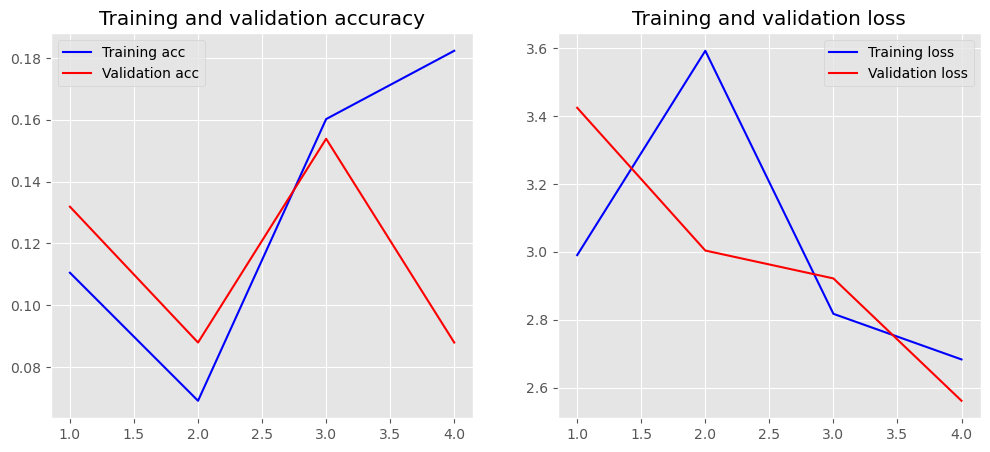

In [38]:
# Tokenizer().word_index = word index
# +1 is from function paramiter
vocabSize = len(tokenizer.word_index) + 1

model = Sequential()
model.add(Embedding(input_dim=vocabSize,
                   output_dim=2000,
                   input_length=maxlen))
model.add(SimpleRNN(2000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(500,  activation="relu"))
model.add(Dense(9, activation="softmax"))

model.summary()

lost_func = CategoricalCrossentropy()
otm = Adam(learning_rate=0.00089)
model.compile(optimizer=otm, loss=lost_func, metrics=["accuracy"])

print("x", xTrain.shape, ":", "y", yTrain.shape)
history = model.fit(xTrain, yTrain, validation_data=(xTest, yTest), batch_size=46, epochs=4, verbose=1)

y_predict = model.predict(xTest)
print(model.evaluate(xTest, yTest, verbose=1))

y_predict = np.argmax(y_predict, axis=1)
cm = confusion_matrix(np.argmax(yTest, axis=1), y_predict)
report = classification_report(np.argmax(yTest, axis=1), y_predict)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(report)

plot_history(history)